ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient

relation - Relation of patient who completed the test

Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('/content/train.csv')
print('Total instances in the dataset: ', df.shape[0])
print('Total columns in the dataset: ', df.shape[1])
df.info()
df.head()

Total instances in the dataset:  800
Total columns in the dataset:  22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    obje

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


<Axes: >

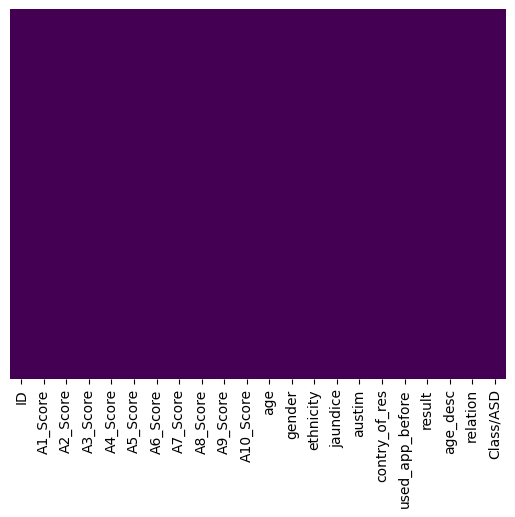

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

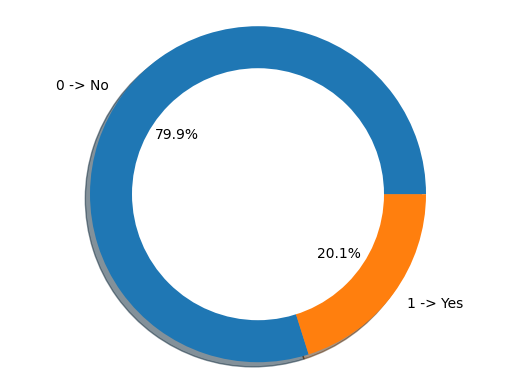

In [ ]:
plt.pie(df['Class/ASD'].value_counts(), labels=['0 -> No','1 -> Yes'], autopct='%1.1f%%', shadow=True)

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,facecolor='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

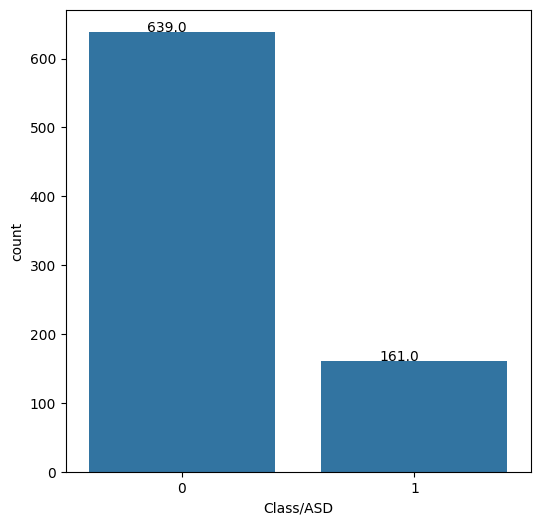

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.countplot(x='Class/ASD', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
df['gender'].value_counts()

m    530
f    270
Name: gender, dtype: int64

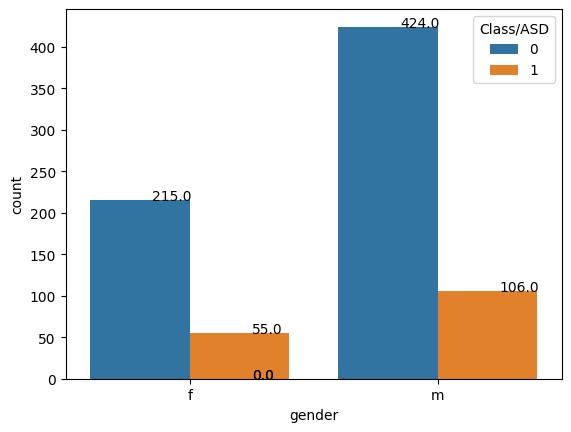

In [ ]:
ax = sns.countplot(x='gender', data=df, hue='Class/ASD')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [ ]:
#Checking unique values in the categorical columns
for col in df.columns:
    print(col,':')
    n = df[col].nunique()

    if n < 25:
        print(df[col].unique())

ID :
A1_Score :
[1 0]
A2_Score :
[0 1]
A3_Score :
[1 0]
A4_Score :
[0 1]
A5_Score :
[1 0]
A6_Score :
[0 1]
A7_Score :
[1 0]
A8_Score :
[0 1]
A9_Score :
[1 0]
A10_Score :
[1 0]
age :
gender :
['f' 'm']
ethnicity :
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice :
['no' 'yes']
austim :
['no' 'yes']
contry_of_res :
used_app_before :
['no' 'yes']
result :
age_desc :
['18 and more']
relation :
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']
Class/ASD :
[0 1]


In [ ]:
df.drop(['age_desc','ID'], axis=1, inplace= True)

<ipython-input-10-af7d660543f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class/ASD'] == 1]['result'], ax= axes[0],bins=20, kde=True)
<ipython-input-10-af7d660543f4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Class/ASD']== 1]['age'], ax= axes[1],bins=20, kde=True)


<Axes: xlabel='age', ylabel='Density'>

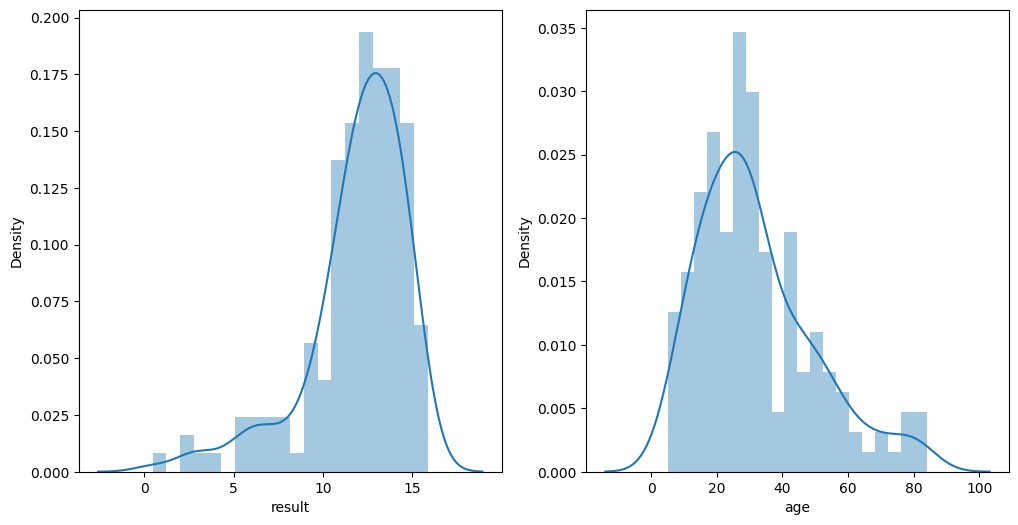

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.distplot(df[df['Class/ASD'] == 1]['result'], ax= axes[0],bins=20, kde=True)
sns.distplot(df[df['Class/ASD']== 1]['age'], ax= axes[1],bins=20, kde=True)

<Axes: xlabel='age', ylabel='result'>

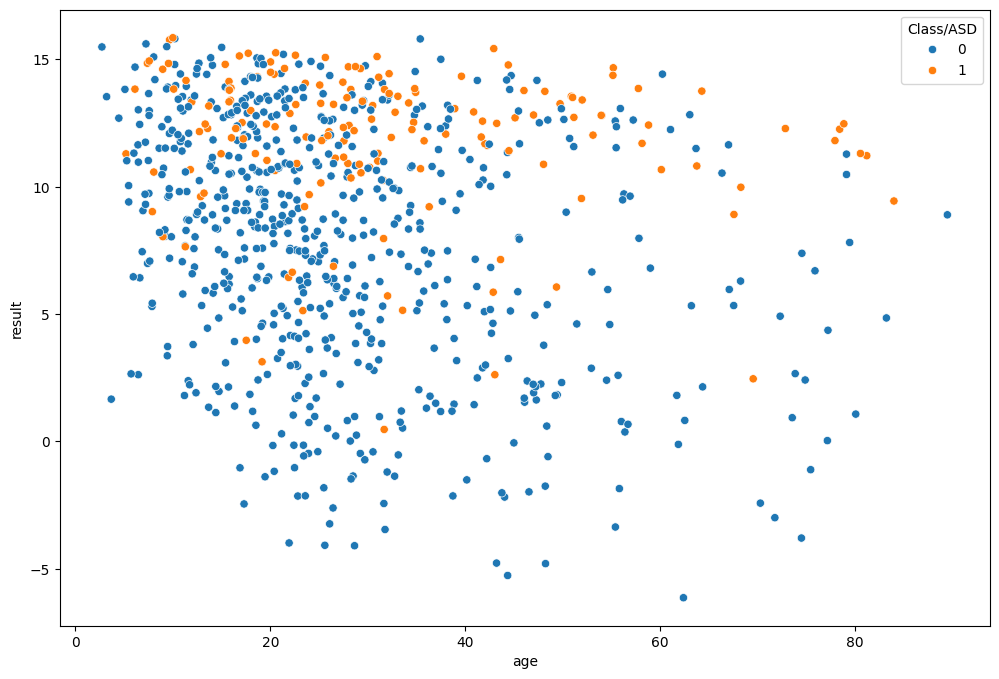

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='result', data=df, hue='Class/ASD')

In [ ]:
num_df = df.select_dtypes(include='number')

In [ ]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A1_Score   800 non-null    int64  
 1   A2_Score   800 non-null    int64  
 2   A3_Score   800 non-null    int64  
 3   A4_Score   800 non-null    int64  
 4   A5_Score   800 non-null    int64  
 5   A6_Score   800 non-null    int64  
 6   A7_Score   800 non-null    int64  
 7   A8_Score   800 non-null    int64  
 8   A9_Score   800 non-null    int64  
 9   A10_Score  800 non-null    int64  
 10  age        800 non-null    float64
 11  result     800 non-null    float64
 12  Class/ASD  800 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 81.4 KB


In [ ]:
cat_df = df.select_dtypes(include='object')

In [ ]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           800 non-null    object
 1   ethnicity        800 non-null    object
 2   jaundice         800 non-null    object
 3   austim           800 non-null    object
 4   contry_of_res    800 non-null    object
 5   used_app_before  800 non-null    object
 6   relation         800 non-null    object
dtypes: object(7)
memory usage: 43.9+ KB


<Axes: >

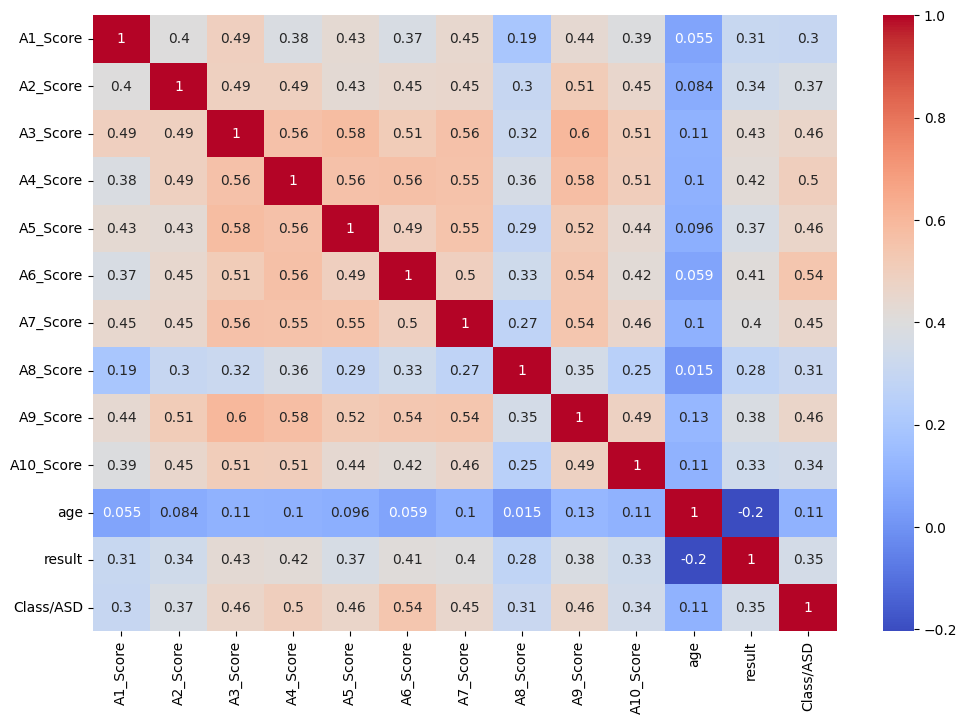

In [ ]:
plt.figure(figsize=(12,8))

sns.heatmap(num_df.corr(), annot= True, cmap='coolwarm')

In [ ]:
col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
     'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score','result','age']

# Loop creates feature crosses and check correlation of that feature cross with target column.
#If correlation is higher than 0.56 than it saved that feature cross in the dataframe 'final'
temp = pd.DataFrame(df['Class/ASD'])
final = pd.DataFrame()
for i in range(len(col)-1):

    for j in range(len(col)-1):
        temp['y'] = df[col[i]] * df[col[j]]
        cor = temp.corr()
        if cor.iloc[0][1] > 0.56:
            final[col[i]+',' +col[j]] = temp['y']

In [ ]:
final.shape

(800, 12)

In [ ]:
final.head()

,"A4_Score,A6_Score","A5_Score,A6_Score","A6_Score,A4_Score","A6_Score,A5_Score","A6_Score,A7_Score","A6_Score,A8_Score","A6_Score,A9_Score","A6_Score,A10_Score","A7_Score,A6_Score","A8_Score,A6_Score","A9_Score,A6_Score","A10_Score,A6_Score"
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
li = ['A6_Score,A4_Score','A6_Score,A5_Score','A7_Score,A6_Score','A8_Score,A6_Score','A9_Score,A6_Score','A10_Score,A6_Score']
final.drop(li, axis=1, inplace=True)

In [ ]:
df_final = pd.concat([df, final], axis=1)

In [ ]:
df_final.shape

(800, 26)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   A1_Score            800 non-null    int64  
 1   A2_Score            800 non-null    int64  
 2   A3_Score            800 non-null    int64  
 3   A4_Score            800 non-null    int64  
 4   A5_Score            800 non-null    int64  
 5   A6_Score            800 non-null    int64  
 6   A7_Score            800 non-null    int64  
 7   A8_Score            800 non-null    int64  
 8   A9_Score            800 non-null    int64  
 9   A10_Score           800 non-null    int64  
 10  age                 800 non-null    float64
 11  gender              800 non-null    object 
 12  ethnicity           800 non-null    object 
 13  jaundice            800 non-null    object 
 14  austim              800 non-null    object 
 15  contry_of_res       800 non-null    object 
 16  used_app

In [ ]:
df = df_final.copy()

<ipython-input-25-02d6f88d560b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True)


<Axes: >

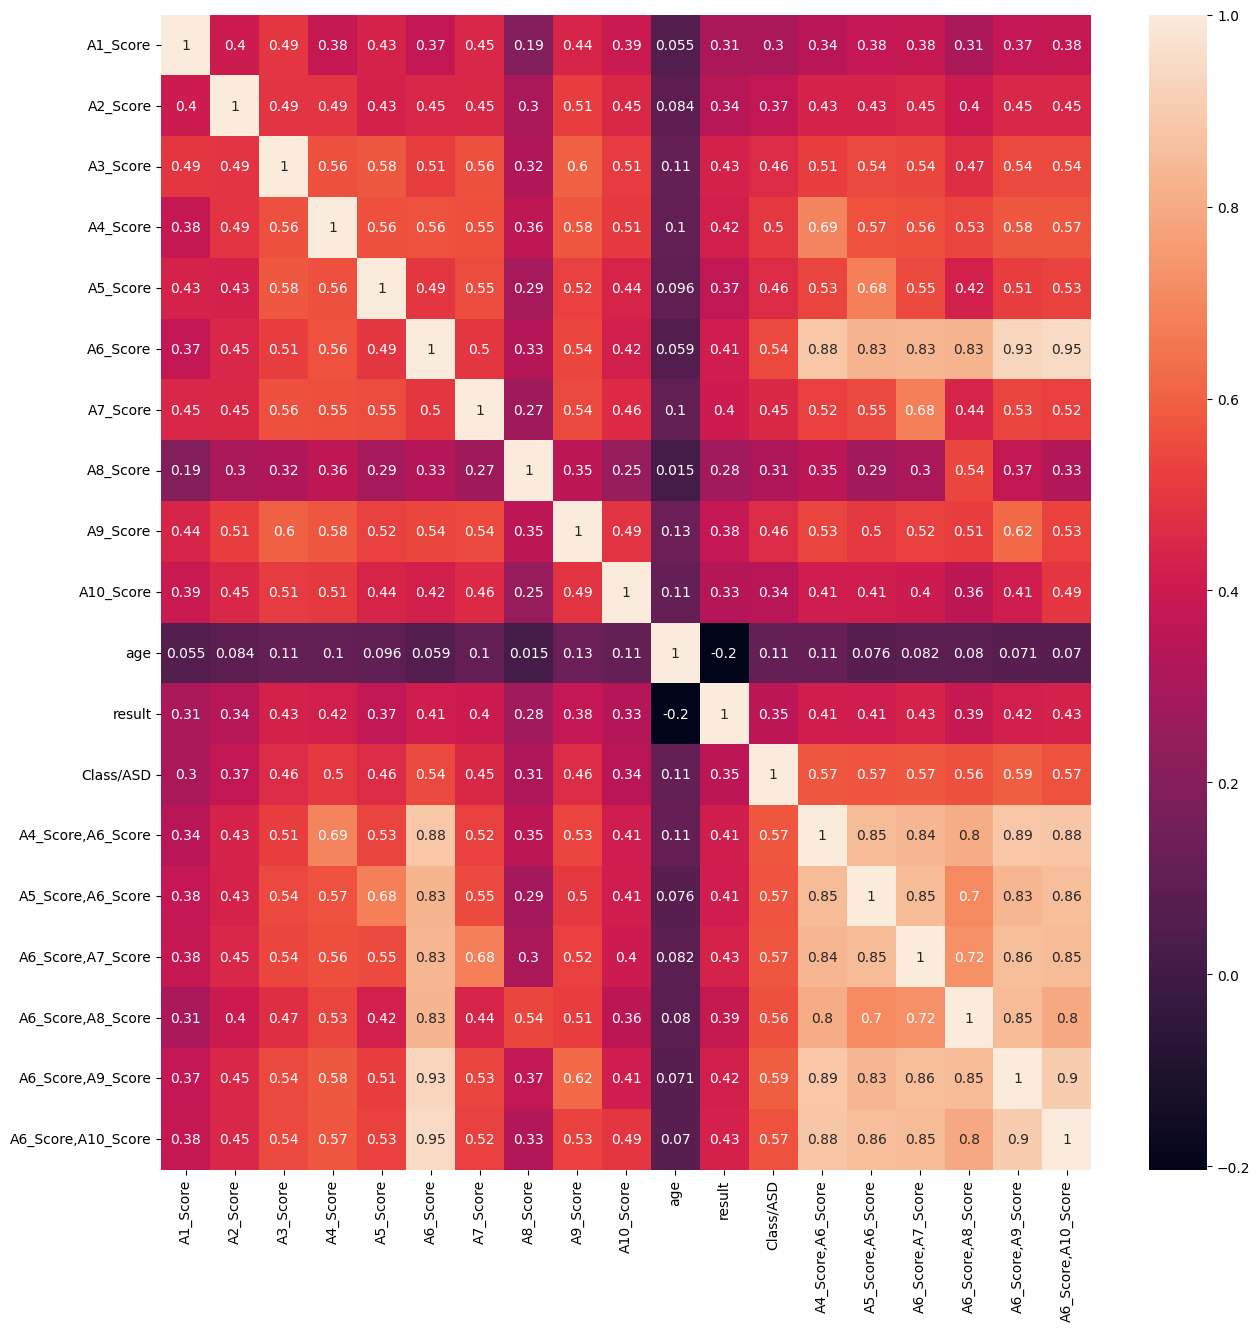

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot= True)

In [ ]:
df.drop(['A6_Score,A10_Score','A4_Score,A6_Score'], axis=1, inplace = True)

In [ ]:
cor = num_df.corr().loc['Class/ASD']
idx = cor.index
li = []
for i in idx:
    if cor[i] > -0.32 and cor[i] < 0.32:
        li.append(i)

print(li)

['A1_Score', 'A8_Score', 'age']


In [ ]:
df.drop(li, axis=1, inplace= True)

In [ ]:
df.corr()['Class/ASD']

<ipython-input-29-2d1ce9a818fc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Class/ASD']


A2_Score             0.372740
A3_Score             0.460927
A4_Score             0.501046
A5_Score             0.461773
A6_Score             0.543010
A7_Score             0.452338
A9_Score             0.463347
A10_Score            0.343736
result               0.351906
Class/ASD            1.000000
A5_Score,A6_Score    0.567659
A6_Score,A7_Score    0.572487
A6_Score,A8_Score    0.560265
A6_Score,A9_Score    0.593825
Name: Class/ASD, dtype: float64

In [ ]:
df['relation'].value_counts()

Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [ ]:
df['relation'].replace('?', df['relation'].value_counts().index[0], inplace= True)

In [ ]:
df['relation'].value_counts()

Self                        749
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [ ]:
df['ethnicity'].value_counts()

White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [ ]:
df['ethnicity'].replace('?', 'Unkown', inplace= True)

In [ ]:
df['ethnicity'].value_counts()

White-European     257
Unkown             203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [ ]:
df['contry_of_res'].value_counts()

United States           134
India                   108
New Zealand              78
United Kingdom           67
Jordan                   55
United Arab Emirates     40
Australia                37
Canada                   30
Afghanistan              22
Netherlands              20
Austria                  18
Sri Lanka                17
Brazil                   12
Spain                    10
France                   10
Kazakhstan               10
Ireland                   9
Iran                      8
Russia                    7
South Africa              6
Italy                     6
Bahamas                   6
Malaysia                  6
Viet Nam                  5
Pakistan                  4
China                     4
Mexico                    4
Nicaragua                 4
Armenia                   4
Azerbaijan                4
Iraq                      4
Aruba                     4
Saudi Arabia              4
AmericanSamoa             4
Bolivia                   3
Serbia              

ONE HOT ENCODING

In [ ]:
cat_feats = list(cat_df.columns)
cat_feats


['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first',handle_unknown = 'ignore')
df_cat = enc.fit_transform(df[cat_feats])
df_cat = pd.DataFrame(df_cat.toarray())

In [ ]:
df.drop(cat_feats, axis=1, inplace= True)

In [ ]:
df = pd.concat([df, df_cat],axis = 1)

In [ ]:
df.shape

(800, 88)

CREATE TRAINING DATA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df.drop('Class/ASD', axis=1), df['Class/ASD'], test_size=0.25, random_state=42)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((600, 87), (600,), (200, 87), (200,))

In [ ]:
from imblearn.over_sampling import SMOTE
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(X_train,y_train)

In [ ]:
X_train = oversampled_X.copy()
y_train = oversampled_Y.copy()

In [ ]:
y_train_series = pd.Series(y_train)
y_train_counts = y_train_series.value_counts()
print(y_train_counts)

0    481
1    481
dtype: int64


MODEL TRAINING

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [ ]:
lg = LogisticRegression(solver='saga',max_iter=4000)
lg.fit(X_train, y_train)

LogisticRegression(max_iter=4000, solver='saga')

In [ ]:
X_val.columns = X_val.columns.astype(str)
pred = lg.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print('Accuracy using Logistic Regression: ', accuracy_score(y_val, pred))
print('F1-Score using Logistic Regression: ', f1_score(y_val, pred) )

Accuracy using Logistic Regression:  0.84
F1-Score using Logistic Regression:  0.6734693877551021


RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
pred = rf.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
rf.score(X_train, y_train)

1.0

In [ ]:
print('Accuracy using Random Forest: ', accuracy_score(y_val, pred))
print('F1-Score using Random Forest: ', f1_score(y_val, pred) )

Accuracy using Random Forest:  0.885
F1-Score using Random Forest:  0.7228915662650603


SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='poly',degree=3, C=20)
svc.fit(X_train, y_train)

SVC(C=20, kernel='poly')

In [ ]:
pred = svc.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:

pred_train = svc.predict(X_train)
accuracy_score(y_train, pred_train)

0.9126819126819127

In [ ]:
print('Accuracy using SVC: ', accuracy_score(y_val, pred))
print('F1-Score using SVC: ', f1_score(y_val, pred) )

Accuracy using SVC:  0.855
F1-Score using SVC:  0.7070707070707071


In [ ]:
from sklearn.svm import SVC
# Creating SVC model with RBF kernel
svc_rbf = SVC(kernel='rbf', C=20)
svc_rbf.fit(X_train, y_train)

SVC(C=20)

In [ ]:
pred1 = svc_rbf.predict(X_val)
pred1_train = svc_rbf.predict(X_train)
accuracy_score(y_train, pred1_train)
print('Accuracy using SVC: ', accuracy_score(y_val, pred1))
print('F1-Score using SVC: ', f1_score(y_val, pred1) )


Accuracy using SVC:  0.85
F1-Score using SVC:  0.7115384615384616


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.svm import SVC
svc_sigmoid = SVC(kernel='sigmoid', C=20)
svc_sigmoid.fit(X_train, y_train)

SVC(C=20, kernel='sigmoid')

In [ ]:

pred2 = svc_sigmoid.predict(X_val)
pred2_train = svc_sigmoid.predict(X_train)
accuracy_score(y_train, pred2_train)
print('Accuracy using SVC: ', accuracy_score(y_val, pred2))
print('F1-Score using SVC: ', f1_score(y_val, pred2) )

Accuracy using SVC:  0.545
F1-Score using SVC:  0.28346456692913385


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


WE HAVE THE HIGHEST ACCURACY USING Random Forest Classifier

Model testing

In [ ]:
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  austim           200 non-null    object 
 16  contry_of_res    200 non-null    object 
 17  used_app_before 

In [ ]:
df_test.head()


,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [ ]:
df_test.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
dtype: int64

In [ ]:
for col in df_test.columns:
    print(col,':')
    n = df_test[col].nunique()

    if n < 25:
        print(df_test[col].unique())

ID :
A1_Score :
[1 0]
A2_Score :
[1 0]
A3_Score :
[0 1]
A4_Score :
[0 1]
A5_Score :
[1 0]
A6_Score :
[1 0]
A7_Score :
[0 1]
A8_Score :
[0 1]
A9_Score :
[1 0]
A10_Score :
[1 0]
age :
gender :
['m' 'f']
ethnicity :
['White-European' 'Asian' '?' 'Middle Eastern ' 'South Asian' 'Pasifika'
 'Turkish' 'Latino' 'Black' 'Others' 'Hispanic']
jaundice :
['yes' 'no']
austim :
['no' 'yes']
contry_of_res :
used_app_before :
['no' 'yes']
result :
age_desc :
['18 and more']
relation :
['Self' 'Parent' '?' 'Relative' 'Others' 'Health care professional']


In [ ]:
df_test.drop(['age_desc'], axis=1, inplace= True)
col_id = df_test.pop('ID')
final.columns

Index(['A4_Score,A6_Score', 'A5_Score,A6_Score', 'A6_Score,A7_Score',
       'A6_Score,A8_Score', 'A6_Score,A9_Score', 'A6_Score,A10_Score'],
      dtype='object')

In [ ]:
final_test = pd.DataFrame()
for col in list(final.columns):
    li = col.split(',')
    final_test[li[0] + ',' + li[1]] = df_test[li[0]] * df_test[li[1]]
final_test.shape

(200, 6)

In [ ]:
final_test.shape

(200, 6)

In [ ]:
final_test.columns

Index(['A4_Score,A6_Score', 'A5_Score,A6_Score', 'A6_Score,A7_Score',
       'A6_Score,A8_Score', 'A6_Score,A9_Score', 'A6_Score,A10_Score'],
      dtype='object')

In [ ]:
df_test = pd.concat([df_test, final_test], axis=1)
df_test.shape

(200, 25)

In [ ]:
df_test['relation'].replace('?', df_test['relation'].value_counts().index[0], inplace= True)
df_test['ethnicity'].replace('?', df_test['ethnicity'].value_counts().index[0], inplace= True)
df_test.shape

(200, 25)

In [ ]:
df_test.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'A4_Score,A6_Score', 'A5_Score,A6_Score',
       'A6_Score,A7_Score', 'A6_Score,A8_Score', 'A6_Score,A9_Score',
       'A6_Score,A10_Score'],
      dtype='object')

In [ ]:
df_test.drop(['A1_Score', 'A8_Score', 'age'], axis=1, inplace= True)
df_test.drop(['A6_Score,A10_Score','A4_Score,A6_Score'], axis=1, inplace = True)

In [ ]:
df_cat_new = enc.transform(df_test[cat_feats])
df_cat_new = pd.DataFrame(df_cat_new.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
df_cat_new

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_test.drop(cat_feats, axis=1, inplace= True)
df_test = pd.concat([df_test, df_cat_new],axis = 1)

In [ ]:
df_test.shape

(200, 87)

In [ ]:
df_test.columns = df_test.columns.astype(str)
pred = rf.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
autism_df = pd.DataFrame(col_id)

In [ ]:
autism_df['Class/ASD'] = pred
autism_df

,ID,Class/ASD
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
195,196,0
196,197,0
197,198,0
198,199,0


In [ ]:
autism_df.to_csv('submission.csv',index=False)